In [25]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import WhitespaceTokenizer

import plotly.graph_objects as go
import plotly.express as px

warnings.filterwarnings('ignore')

In [26]:
data_1 = pd.read_csv('Dataset_part_JT.csv', encoding="utf-8")
data_2 = pd.read_csv('Dataset_part_PP.csv', encoding="utf-8")





print(data_1.info())
print(data_2.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       468 non-null    object
 1   Clean_Resume   468 non-null    object
 2   Common Skills  468 non-null    object
dtypes: object(3)
memory usage: 11.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Category       5197 non-null   object
 1   Clean_Resume   5197 non-null   object
 2   Common Skills  5197 non-null   object
dtypes: object(3)
memory usage: 121.9+ KB
None


In [27]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = data_1.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = data_1.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [28]:
print(data_2.shape)
print(data_2.columns)
print(data_2.Category.value_counts())


(5197, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               2502
Python Developer             2359
Testing                        70
DevOps Engineer                55
Web Designing                  45
Blockchain                     40
Data Science                   40
Database                       33
DotNet Developer               28
Network Security Engineer      25
Name: count, dtype: int64


In [29]:

print(data_1.shape)
print(data_1.columns)
print(data_1.Category.value_counts())


(468, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
Data Science                 40
Blockchain                   40
Database                     33
DotNet Developer             28
Network Security Engineer    25
Name: count, dtype: int64


In [30]:
rows_to_add = data_1.shape[0] - data_2.shape[0]

additional_rows = pd.DataFrame(index=range(rows_to_add), columns=data_2.columns)

df2_aligned = pd.concat([additional_rows, data_2], ignore_index=True)

result = pd.concat([data_1, df2_aligned], axis=0)

result.drop(result.columns[result.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)



In [31]:
# Verifica si hay valores nulos en el dataset
nulos_en_dataset = result.isnull().any().any()

# Mostrará True si hay al menos un valor nulo en el dataset, de lo contrario mostrará False
print(nulos_en_dataset)


# Si quieres obtener más detalles, como la cantidad de valores nulos por columna, puedes hacer lo siguiente:
nulos_por_columna = result.isnull().sum()
print(nulos_por_columna)

False
Category         0
Clean_Resume     0
Common Skills    0
dtype: int64


In [21]:
print(result.shape)
print(result.columns)
print(result.Category.value_counts())


(5665, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               2586
Python Developer             2407
Testing                       140
DevOps Engineer               110
Web Designing                  90
Data Science                   80
Blockchain                     80
Database                       66
DotNet Developer               56
Network Security Engineer      50
Name: count, dtype: int64


In [23]:
result['Category'] = result['Category'].str.strip()

In [35]:
result["Category"].unique()

array(['Data Science', 'Web Designing', 'Java Developer',
       'Python Developer', 'DevOps Engineer', 'Network Security Engineer',
       'Database', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [41]:
#reducir las etiquetas a 1200
def sample_n(df, n=140):
    return df.sample(min(len(df), n))

df = result.groupby('Category').apply(sample_n).reset_index(drop=True)

In [42]:
print(df.shape)
print(df.columns)
print(df.Category.value_counts())

(952, 3)
Index(['Category', 'Clean_Resume', 'Common Skills'], dtype='object')
Category
Java Developer               140
Python Developer             140
Testing                      140
DevOps Engineer              110
Web Designing                 90
Blockchain                    80
Data Science                  80
Database                      66
DotNet Developer              56
Network Security Engineer     50
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Category'>

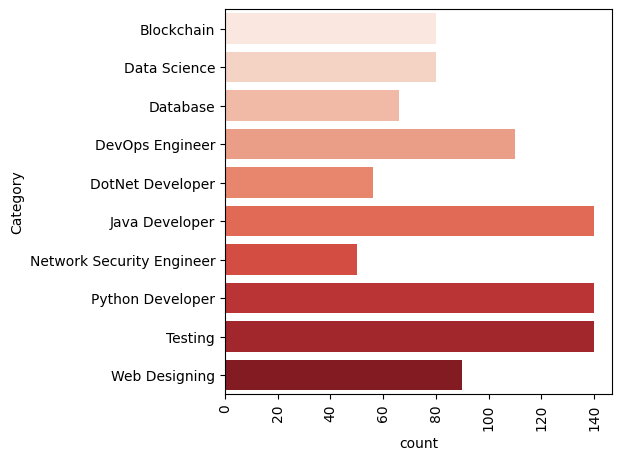

In [44]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df, palette='Reds')

In [46]:
df.to_csv('DatasetSinRellenar.csv', index=False)